* Student name:Sandra Kiptum
* Student pace: full time
* Instructor name: Nikita

# Question
Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company.</br>



# Business Understanding</br>

* Overview <br>
SyriaTel is a telecommunication company. It has noted that several custormers are churning their network. Our goal is to examine the data set and build models that can predict if a client will so0n stop doing business with the company and hopefully our model will help them identify churners and stop it before it happens

* Proposed Solution<br>
to build several classifiers and pick the one with the best metrics for them to use


* Problem Statement<br>
To develop a predictive model that accurately identifies customers at risk of churn within the Syriatel network, enabling proactive retention strategies to minimize customer attrition and maximize business revenue.


* Objective<br>
The objective of the project is to build a predictive model to identify customers who are likely to churn, i.e., customers who are at risk of leaving the Syriatel network.

* stakeholders<br>
the major stakeholders would be the CEO and the shareholders



# Data Understanding

this data comes from SyriaTel a telecommunication company.<br>
it contains various columns that will be further explained below. It is customer data including their phone numbers, states, information about their calls and wether they churned or not.<br>
the data has record of 3333 clients which should be sufficient to as an accurate representation of the population

Columns (meaning of the columns)
- state: the state the customer lives in
- account length: the number of days the customer has had an account
- area code: the area code of the customer
- phone number: the phone number of the customer
- international plan: true if the customer has the international plan, otherwise false
- voice mail plan: true if the customer has the voice mail plan, otherwise false
number vmail messages: the number of voicemails the customer has sent
- total day minutes: total number of minutes the customer has been in calls during the day
- total day calls: total number of calls the user has done during the day
- total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
- total eve minutes: total number of minutes the customer has been in calls during the evening
- total eve calls: total number of calls the customer has done during the evening
- total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
- total night minutes: total number of minutes the customer has been in calls during the night
- total night calls: total number of calls the customer has done during the night
- total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
- total intl minutes: total number of minutes the user has been in international calls
- total intl calls: total number of international calls the customer has done
- total intl charge: total amount of money the customer was charged by the Telecom company for international calls
- customer service calls: number of calls the customer has made to customer service
- churn: true if the customer terminated their contract, otherwise false


it contains various 21 columns including what we will use as our target variable </br>
the other 20 columns may be useful as the precictors during modelling </br>
below is a rundown of what each column represents:</br>





# DATA PREPARATION	
	
	


In [108]:
# importing neccesary modules 
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix,  plot_confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from scipy import stats
from sklearn.pipeline import Pipeline

from functions import load_data

In [67]:
# Loading of Dataset
df = pd.read_csv("data.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [68]:
def load_data(data):
    df = pd.read_csv(data)
    head = df.head()
    shape = df.shape
    describe = df.describe()

    output = {
        "head": head,
        "shape": shape,
        "describe": describe
    }

    return output

In [69]:
load_data("data.csv")


{'head':   state  account length  area code phone number international plan  \
 0    KS             128        415     382-4657                 no   
 1    OH             107        415     371-7191                 no   
 2    NJ             137        415     358-1921                 no   
 3    OH              84        408     375-9999                yes   
 4    OK              75        415     330-6626                yes   
 
   voice mail plan  number vmail messages  total day minutes  total day calls  \
 0             yes                     25              265.1              110   
 1             yes                     26              161.6              123   
 2              no                      0              243.4              114   
 3              no                      0              299.4               71   
 4              no                      0              166.7              113   
 
    total day charge  ...  total eve calls  total eve charge  \
 0          

In [70]:
# checking for null values 
df.isna().value_counts()

state  account length  area code  phone number  international plan  voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total night charge  total intl minutes  total intl calls  total intl charge  customer service calls  churn
False  False           False      False         False               False            False                  False              False            False             False              False            False             False                False              False               False               False             False              False                   False    3333
dtype: int64

from this we can see that we have no null values</br>


In [71]:
#checking our data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

we can also see that all columns are in the proper data types <br>
 

In [73]:
# now let's look at our statistical summary
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


the data is well distributed. <br>
there is no obvious outliers aside from a few columns like total night calls<br>

to make my work easier let me make a class to help with data preparation

In [74]:
class DataPreparation:
    def __init__(self, data):
        self.df = pd.read_csv(data)

    def check_duplicates(self):
        return self.df.duplicated().sum()
    
    def remove_outliers_zscore(self):
        """
        Takes in a dataframe and removes outliers from the dataframe using Z-score method.
        """
        z_scores = np.abs(stats.zscore(self.df.select_dtypes(include=[np.number])))
        
        # Identify rows with any Z-score greater than the threshold
        outliers = (z_scores > 3).any(axis=1)
        
        # Remove outliers from the dataframe
        df_cleaned = self.df[~outliers]
        
        return df_cleaned

    def outlier_plot(self):
        """
        Plots boxplots to visualize outliers in the dataset.
        """
        # List of columns for the first boxplot
        cols1 = ["account length", "total day minutes", "total day calls",
                "number vmail messages",
                "total eve minutes", "total eve calls", "total night minutes",
                "total night calls"]
        cols2 = ["total intl minutes", "total intl calls", "customer service calls"]

        # Create a figure with one row and two columns
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

        # Create a boxplot for the first subset of columns in the first column
        sns.boxplot(data=self.df[cols1], ax=axes[0])
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

        # Create a boxplot for the second subset of columns in the second column
        sns.boxplot(data=self.df[cols2], ax=axes[1])
        axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

        # Setting the figure title
        fig.suptitle("Boxplots for different subsets of columns")

        # Show the plot
        plt.show()


let's check for outliers 

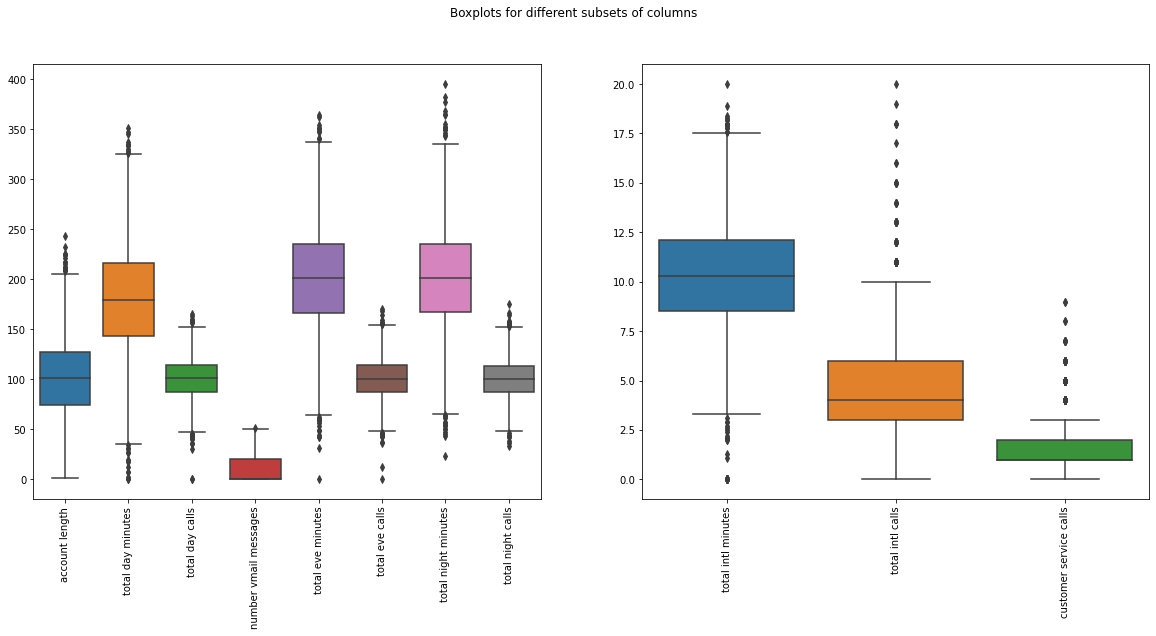

In [75]:
# Calculate the Z-scores
outlier_prep = DataPreparation("data.csv")
outlier_prep.outlier_plot()

from this we can see that we have outliers in different columns, let's drop those rows

In [77]:
df = outlier_prep.remove_outliers_zscore()

In [105]:
len(df)

3169

we still have outliers but they are definately less than what we had before and they are all closer to the whiskers of the plot, we can therefore assume that this is brought about by the recalculation of standard deviation after removal of the previous outliers

In [107]:
outlier_prep.check_duplicates()

0

no duplicates!!!<br>

Im guessing this is the cleanest data i'll ever work with</br>

In [79]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

looking at our columns the phone number gives the same vibes as an index. they don't hold any meaning and are nearly randomly allocated and because this column won't hold any meaning when it comes to modelling, i will drop it

In [80]:
df.drop(["phone number"], axis=1, inplace=True)
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

# Exploratory Data Analysis

## Univariate Analysis

we'll start with our y column

<AxesSubplot:xlabel='churn', ylabel='count'>

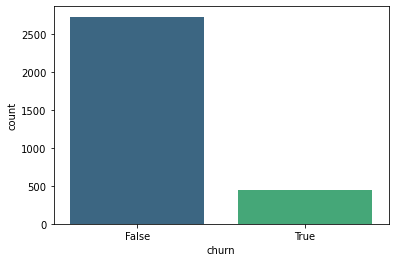

In [81]:
# churn column
sns.countplot(data=df, x="churn", palette="viridis")

SyriaTel has a higher than desired likelyhood of customers churning which is quite scary but hopefully we can provide insights on this<br>
we can also tell that there is a class imbalance, so let's keep this in mind for when we will be modelling

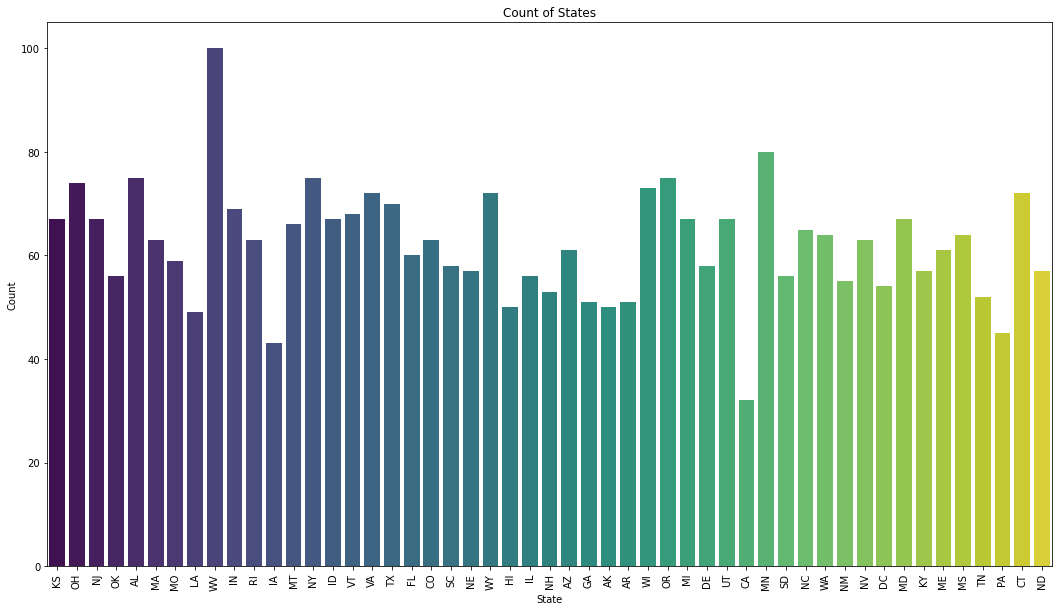

In [82]:
plt.figure(figsize=(18, 10)) 
sns.countplot(data=df, x="state", palette="viridis")

plt.title("Count of States")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

the company has customers across all states with the leading be West Virginia and the least being Carlifonia

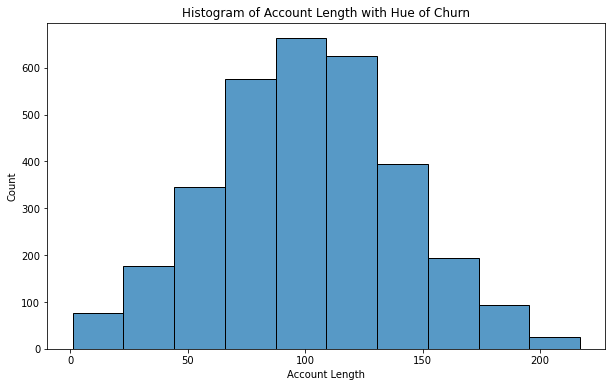

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="account length", bins=10, multiple="stack")
plt.title("Histogram of Account Length with Hue of Churn")
plt.xlabel("Account Length")
plt.ylabel("Count")
plt.show()

Okay the account length is also normally distributed <br>
let's check on the minute distribution for the customers

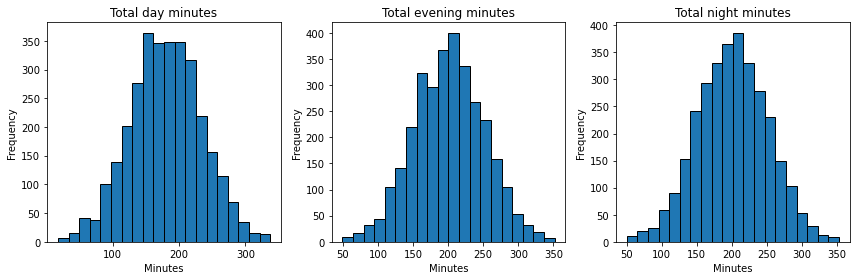

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].hist(df["total day minutes"], bins=20, edgecolor="k")
axs[0].set_title("Total day minutes")
axs[0].set_xlabel("Minutes")
axs[0].set_ylabel("Frequency")

axs[1].hist(df["total eve minutes"], bins=20, edgecolor="k")
axs[1].set_title("Total evening minutes")
axs[1].set_xlabel("Minutes")
axs[1].set_ylabel("Frequency")

axs[2].hist(df["total night minutes"], bins=20, edgecolor="k")
axs[2].set_title("Total night minutes")
axs[2].set_xlabel("Minutes")
axs[2].set_ylabel("Frequency")

plt.tight_layout()

plt.show()


they are all normally distributed, perfect!

## BIVARIATE ANALYSIS

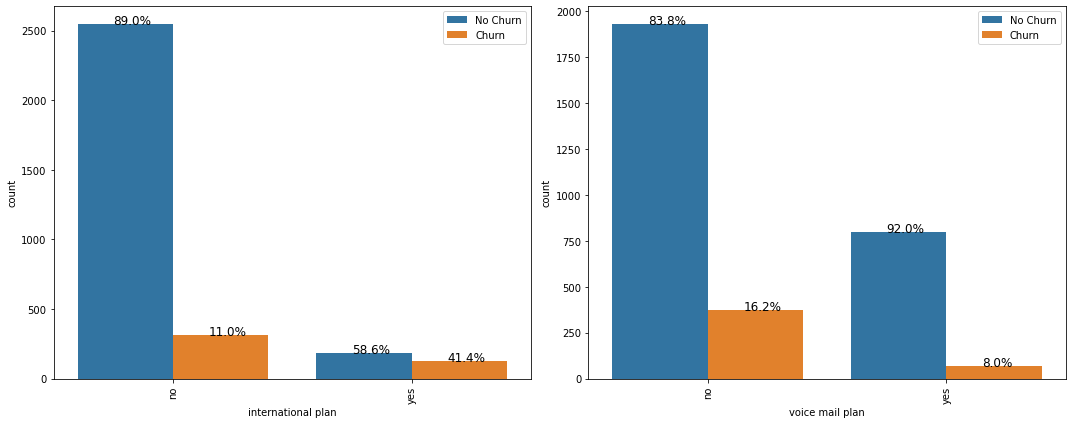

In [85]:
categoric_cols = ["international plan", "voice mail plan"]

fig, axes = plt.subplots(nrows=1, ncols=len(categoric_cols), figsize=(15, 6))
for i, col in enumerate(categoric_cols):
    ax = sns.countplot(x=col, hue="churn", data=df, order=df[col].value_counts().iloc[0:15].index, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles, ["No Churn", "Churn"], loc="upper right")

    totals = df.groupby(col)["churn"].count().values

    for j, p in enumerate(ax.patches):
        percentage = '{:.1f}%'.format(100 * p.get_height()/totals[j % 2])
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()


from this we can see that people with international plans are more likely to churn. this might be due to the cost of the calls in this comapany or issues associated with the international plans that could be making the plan unsatisfactory to the client <br>

customers without voicemail also tend to churn twice as much as their counterparts with voice mail

In [86]:
df["cost per intl minute"] = df["total intl charge"] / df["total intl minutes"]
df["cost per day minute"] = df["total day charge"] / df["total day minutes"]
df["cost per eve minute"] = df["total eve charge"] / df["total eve minutes"]
df["cost per night minute"] = df["total night charge"] / df["total night minutes"]
df.head(10)


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,cost per intl minute,cost per day minute,cost per eve minute,cost per night minute
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,False,0.270000,0.170011,0.085005,0.044994
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,False,0.270073,0.169988,0.085013,0.045008
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,False,0.269672,0.170008,0.084983,0.045018
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,8.86,6.6,7,1.78,2,False,0.269697,0.170007,0.084976,0.044997
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,False,0.270297,0.170006,0.085030,0.044997
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,...,9.18,6.3,6,1.70,0,False,0.269841,0.170009,0.084995,0.045022
6,MA,121,510,no,yes,24,218.2,88,37.09,348.5,...,9.57,7.5,7,2.03,3,False,0.270667,0.169982,0.084993,0.045014
7,MO,147,415,yes,no,0,157.0,79,26.69,103.1,...,9.53,7.1,6,1.92,0,False,0.270423,0.170000,0.084966,0.044995
8,LA,117,408,no,no,0,184.5,97,31.37,351.6,...,9.71,8.7,4,2.35,1,False,0.270115,0.170027,0.085011,0.044995
9,WV,141,415,yes,yes,37,258.6,84,43.96,222.0,...,14.69,11.2,5,3.02,0,False,0.269643,0.169992,0.085000,0.045006


In [87]:
print(df["cost per intl minute"].mean())
print(df["cost per day minute"].mean())
print(df["cost per eve minute"].mean())
print(df["cost per night minute"].mean())

0.2700555214806399
0.1700033144491041
0.08500119579867038
0.04500034635765997


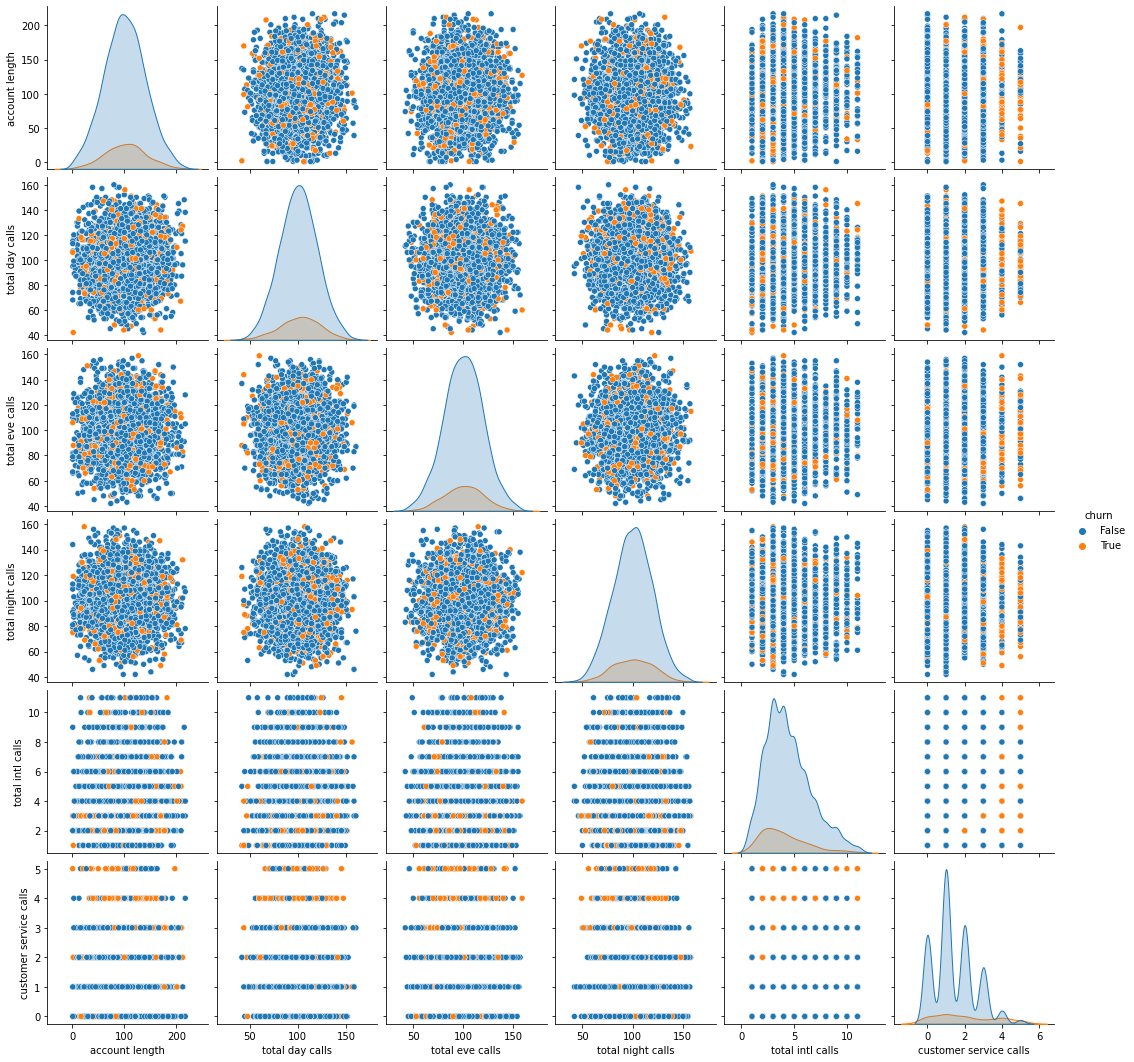

In [88]:
#plotting pairplots for numeric variables
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

There seems to be strong relationship between customer service calls and churn values. After 4 calls, customers are a lot more likely to discontinue their service.<br>

Besides, most customer calls are are associated with disatisfaction with customer service. At this point more than 3 customer calls indicate that it takes long for their issues to be addressed, and thus a possibility of them leaving increases.

from this we would suggest getting people voice mail as well as looking into their customer service. They should try solve issues faster to avoid frustrating the customer and subsequently raising the churn rate

## MULTIVARIATE ANALYSIS

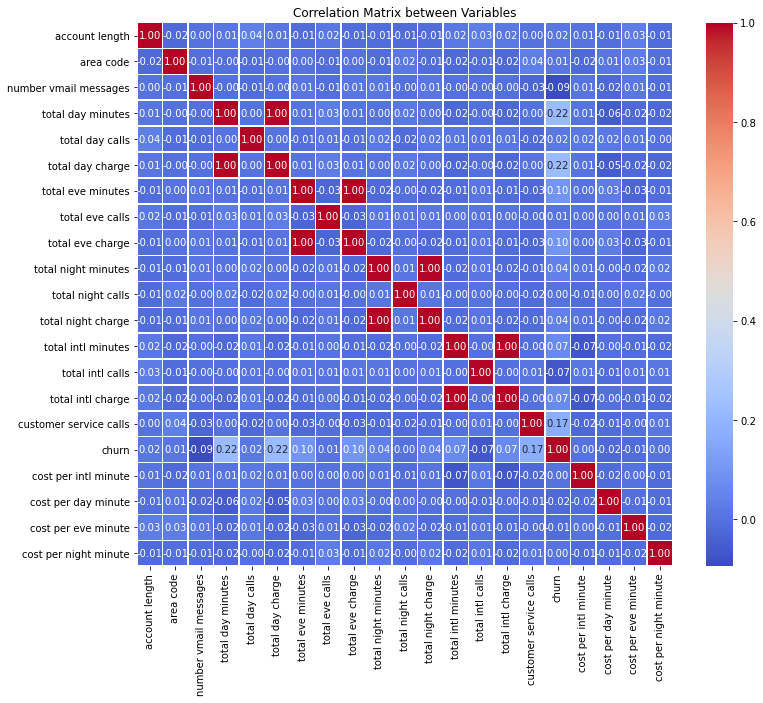

In [89]:
corr_matrix = df.corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix between Variables")
plt.show()

from this we can see that some columns have a strong positive correlation of one. it's actually too strong and it means that one was used to calculate the other. An example is total evening minutes and total evening charge which makes sense cause the charge is a product of the number of minutes and the cost per minute. <br>
let's drop one column per pair(a pair with a correlation of 1) to reduce the complexity of our models

In [90]:
df = df.drop(columns=["total day charge", "total eve charge","total night charge","total intl charge"], axis= 0)


# MODELLING

## PRE-PROCESSING

In [91]:
X = df.drop(["churn", "cost per intl minute", "cost per day minute", "cost per eve minute", "cost per night minute"], axis=1)
y = df["churn"]

In [92]:
X_num = X[X.select_dtypes(include="number").columns]
X_cat = X[X.select_dtypes(exclude="number").columns]

In [93]:
ohe = OneHotEncoder(sparse=False, handle_unknown="error", drop="first")

X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names(X_cat.columns) ,index=X_cat.index)

In [94]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_num), \
                               columns=(X_num.columns) ,index=X_num.index)

In [95]:
X_merged = pd.concat([X_scaled, X_cat_ohe], axis=1)
X_merged

,account length,area code,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,0.687718,-0.527911,1.253323,1.575773,0.476304,-0.073631,-0.060935,0.875815,-0.465100,-0.116056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.155649,-0.527911,1.326937,-0.347037,1.135479,-0.111576,0.143029,1.069882,0.153385,1.272086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.915748,-0.527911,-0.587032,1.172633,0.679127,-1.595427,0.499966,-0.766752,0.204926,0.709325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.427092,-0.692586,-0.587032,2.212994,-1.501219,-2.779711,-0.621836,-0.080515,-0.568180,-1.391647,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.655122,-0.527911,-0.587032,-0.252290,0.628421,-1.054211,1.111857,-0.280584,1.081112,-0.078539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.309261,-0.527911,2.063079,-0.447357,-1.196985,0.287845,1.315821,1.564053,-0.877423,-0.153574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3329,-0.832478,-0.527911,-0.587032,0.944125,-2.211099,-0.952358,-2.304537,-0.192554,1.184193,-0.266126,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3330,-1.845942,1.706955,-0.587032,0.009658,0.425599,1.751724,-2.151564,-0.180550,-0.465100,1.422155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3331,2.106568,1.706955,-0.587032,0.622728,0.222776,-0.828538,-0.825799,-1.234914,1.905759,-1.991924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_merged, y, test_size = 0.3,random_state=777)

as you can remember we had a huge class imbalance, so lets handle that

In [97]:
#removing class imbalance 
smote = SMOTE(0.7, random_state=777)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

c:\Users\Hp\anaconda3\envs\learn-env\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


## Model 1: Logistic Regression

In [116]:
# instansiate a Logistic Regression model
baseline_model = LogisticRegression(fit_intercept=False, C=1e20, solver="liblinear", random_state=7797)
#fit the model to our training data
baseline_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(C=1e+20, fit_intercept=False, random_state=7797,
                   solver='liblinear')

In [99]:
y_hat_train_logistic = baseline_model.predict(X_train_resampled)
y_hat_test_logistic = baseline_model.predict(X_test)


In [100]:
# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_hat_train_logistic, y_train_resampled)
test_accuracy = accuracy_score(y_test, y_hat_test_logistic)
print(train_accuracy, test_accuracy)

0.7881303813038131 0.8128286014721346


this is cute and all but i'll have to basically do  the same thing for all my models, instead i'll build a function to avoid repetition

In [122]:
def model_report(model, X_train, y_train, X_test, y_test):
    """
    Function to fit and test a Classification Model using various metrics
    it takes in:    
        model- Instance of a Classification Model.
        X_train 
        X_test 
        y_train 
        y_test        
        lst the name of a list to store the metrics for all model       
        model_name - so we can tell which model performed which way in te metrics list
    """
    # Train Model
    model.fit(X_train, y_train)
    # Predict on train set
    y_hat_train = model.predict(X_train)
    # Predict on test set
    y_hat_test = model.predict(X_test)
    # confusion matrix for train set                                  
    conf_matrix_train = confusion_matrix(y_train, y_hat_train)
    conf_matrix_train_display_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train).plot()
    # Calculate train metrics
    ps_train = round(precision_score(y_train, y_hat_train), 2)
    rs_train = round(recall_score(y_train, y_hat_train), 2)
    acc_train = round(accuracy_score(y_train, y_hat_train), 2)
    f1_train = round(f1_score(y_train, y_hat_train), 2)
    # confusion matrix for test set
    conf_matrix_test = confusion_matrix(y_test, y_hat_test)
    conf_matrix_test_display_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test).plot()
    # calculating test metrics
    ps_test = round(precision_score(y_test, y_hat_test), 2)
    rs_test = round(recall_score(y_test, y_hat_test), 2)
    acc_test = round(accuracy_score(y_test, y_hat_test), 2)
    f1_test = round(f1_score(y_test, y_hat_test), 2)
    cv_scores = cross_validate(model, X_train, y_train, scoring={"acc": "accuracy", "prec": "precision", "rec": "recall"}, cv=5, return_train_score=True)
    # Print train report
    print(f"Train \nPrecision: {ps_train} | Recall: {rs_train} | Accuracy: {acc_train}")
    print(f"F1-Score: {f1_train}")
    print("Confusion Matrix\n", conf_matrix_train_display_train)
    print("")
    # Print test report
    print(f"Test \nPrecision: {ps_test} | Recall: {rs_test} | Accuracy: {acc_test}")
    print(f"F1-Score: {f1_test}")
    print("Confusion Matrix\n", conf_matrix_test_display_train)
    print("") 
    # output cross validation Report
    print(f"CV \nPrecision: {cv_scores['test_prec'].mean():.2f} | Recall: {cv_scores['test_rec'].mean():.2f} | Accuracy: {cv_scores['test_acc'].mean():.2f}")

    return model



Train 
Precision: 0.75 | Recall: 0.72 | Accuracy: 0.79
F1-Score: 0.74
Confusion Matrix

Test 
Precision: 0.41 | Recall: 0.68 | Accuracy: 0.81
F1-Score: 0.51
Confusion Matrix

CV 
Precision: 0.74 | Recall: 0.70 | Accuracy: 0.77


LogisticRegression(C=1e+20, fit_intercept=False, random_state=7797,
                   solver='liblinear')

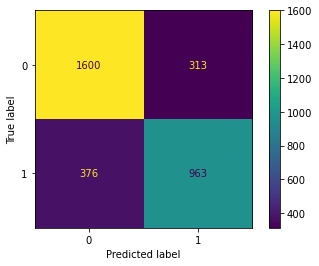

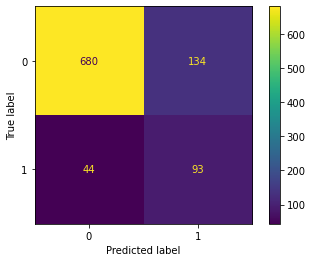

In [123]:
model_report(baseline_model, X_train_resampled, y_train_resampled, X_test, y_test)

The model appears to perform well on the training data, with balanced precision, recall, and a high accuracy<br>
On the test data, precision drops significantly while recall and accuracy remain relatively high. This suggests the model may be overfitting <br>
Cross-validation scores are slightly lower than the training scores but more consistent with the test scores<br>

let us try and handle the over fitting by using a grid search

In [ ]:
#instanciate a model that we will regularise
log_2 = LogisticRegression(solver="liblinear", random_state=7797)

param_grid = {
"C": [0.01, 0.1, 1, 10, 100],  # regularization strength
'penalty': ["l2", "l1"]  # ridge and lasso
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(log_2, param_grid, cv=5, scoring="recall" )
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
grid_search.best_params_


{'C': 10, 'penalty': 'l2'}

Train 
Precision: 0.75 | Recall: 0.72 | Accuracy: 0.79
F1-Score: 0.73
Confusion Matrix

Test 
Precision: 0.41 | Recall: 0.66 | Accuracy: 0.82
F1-Score: 0.51
Confusion Matrix

CV 
Precision: 0.73 | Recall: 0.70 | Accuracy: 0.77


LogisticRegression(C=10, random_state=7797, solver='liblinear')

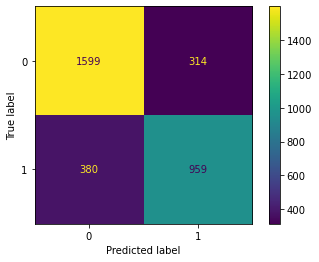

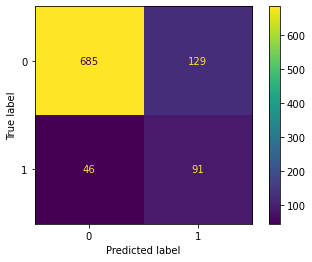

In [124]:
#training regularised logistic regression model
log_regularised = LogisticRegression(solver="liblinear", random_state=7797, C=10, penalty="l2")
model_report(log_regularised, X_train_resampled, y_train_resampled, X_test, y_test)

okay the recall and precision for the test data aren't getting better so maybe this just isn't model for this data, let's try another model

## Model 2 : K Nearest Neighbours

Train 
Precision: 0.83 | Recall: 0.99 | Accuracy: 0.91
F1-Score: 0.91
Confusion Matrix

Test 
Precision: 0.35 | Recall: 0.66 | Accuracy: 0.78
F1-Score: 0.46
Confusion Matrix

CV 
Precision: 0.76 | Recall: 0.97 | Accuracy: 0.86


KNeighborsClassifier()

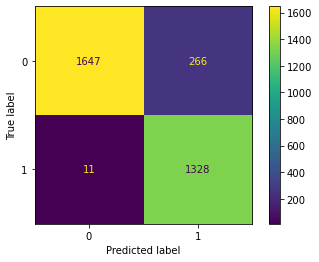

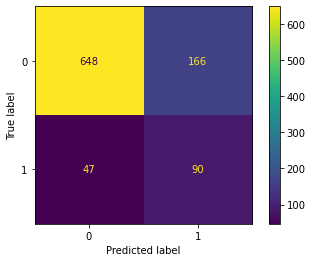

In [125]:
knn = KNeighborsClassifier(n_neighbors=5)
# Scaled Features
model_report(knn, X_train_resampled, y_train_resampled, X_test, y_test)

The high performance on the training set (accuracy of 0.91) compared to the test set (accuracy of 0.78) indicates overfitting<br>
The model performs well on the training data but fails to generalize to test data.<br>
The test precision is very low (0.35), indicating that many instances predicted as positive are actually negative. <br>
The cross-validation results (accuracy of 0.86) are closer to the test set performance, providing a more realistic estimate of the model's ability to generalize to new data.<br>
our cross validation results are enough to go by, but let's try a grid search to have optimal performance


In [126]:
param_grid = {"n_neighbors": range(1, 31)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
grid_search.best_params_

{'n_neighbors': 2}

Train 
Precision: 1.0 | Recall: 1.0 | Accuracy: 1.0
F1-Score: 1.0
Confusion Matrix

Test 
Precision: 0.43 | Recall: 0.48 | Accuracy: 0.83
F1-Score: 0.46
Confusion Matrix

CV 
Precision: 0.86 | Recall: 0.98 | Accuracy: 0.93


KNeighborsClassifier(n_neighbors=2)

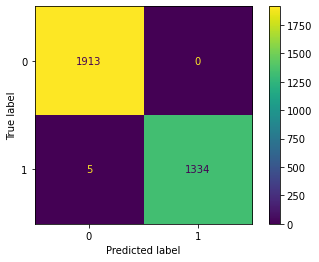

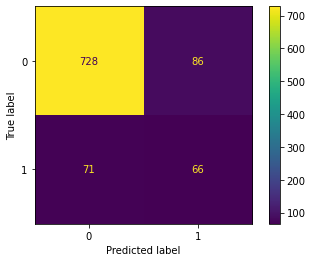

In [127]:
knn_final = KNeighborsClassifier(n_neighbors=2)
model_report(knn_final, X_train_resampled, y_train_resampled, X_test, y_test)

our test metrics are not looking good but our cross validation is getting better. <br>
on to the next model

## Model 3: Decision tree

i'm going to use grid seach from the start now cause it seems i'm going to have to use it all through

In [129]:
# Different Hyperparameters
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": list(range(1,6)),
              "max_features": [20, 40, 60, None]}

# Try Different Hyperparameters
dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=123), scoring="recall", param_grid=param_grid)
dt_clf.fit(X_train_resampled, y_train_resampled)
dt_clf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 60}

Train 
Precision: 0.95 | Recall: 0.84 | Accuracy: 0.92
F1-Score: 0.89
Confusion Matrix

Test 
Precision: 0.75 | Recall: 0.8 | Accuracy: 0.93
F1-Score: 0.77
Confusion Matrix

CV 
Precision: 0.92 | Recall: 0.83 | Accuracy: 0.90


DecisionTreeClassifier(max_depth=5, max_features=60, random_state=123)

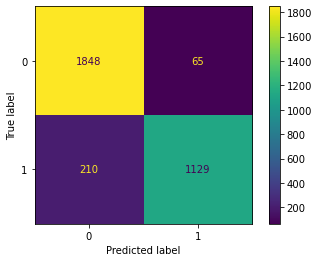

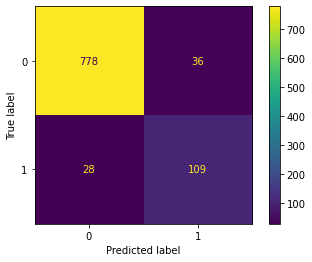

In [130]:
dt_clf_final = DecisionTreeClassifier(random_state=123, criterion="gini",max_depth=5, max_features=60)
model_report(dt_clf_final, X_train_resampled, y_train_resampled, X_test, y_test)

ooou!!!! much better scores overall. we can see a clear decrease in the overfitting with the metric values but the difference in precision is still not the best

## Model 4: Random Forest

In [131]:
param_grid = {"n_estimators": [20, 30, 50],
              "criterion": ["entropy", "gini"],
              "min_samples_leaf": [5, 7]}

rf_clf = GridSearchCV(RandomForestClassifier(random_state=77), param_grid, scoring="recall")
rf_clf.fit(X_train_resampled, y_train_resampled)
rf_clf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 5, 'n_estimators': 50}

Train 
Precision: 0.99 | Recall: 0.94 | Accuracy: 0.97
F1-Score: 0.96
Confusion Matrix

Test 
Precision: 0.77 | Recall: 0.7 | Accuracy: 0.93
F1-Score: 0.73
Confusion Matrix

CV 
Precision: 0.94 | Recall: 0.89 | Accuracy: 0.93


RandomForestClassifier(min_samples_leaf=5, n_estimators=50, random_state=77)

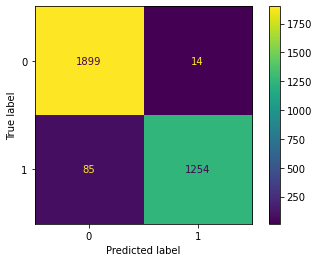

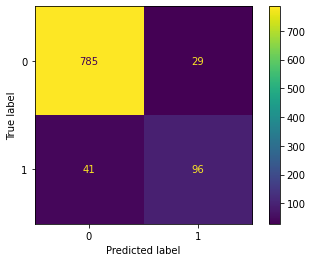

In [132]:
# Generate Report
rf_clf_final = RandomForestClassifier(random_state=77, criterion= "gini", min_samples_leaf=5, n_estimators=50)
model_report(rf_clf_final, X_train_resampled, y_train_resampled, X_test, y_test)

this is also better than the first two models, now we're getting somewhere.<br>
cross validation is definately getting good scores bit with test, train the precision and recall are still to different but the gap is slowly closing

## MODEL 5: XG BOOST

In [133]:
# param_grid = {
#     "max_depth": [3, 5, 7],
#     "learning_rate": [0.1, 0.01, 0.001],
#     "n_estimators": [100, 500, 1000],
#     "reg_alpha": [0, 0.1, 0.5], #L1 regularisation penalize large individual weights resultig in simpler models
#     "reg_lambda": [0, 0.1, 0.5] #L2 penalizes the square of weight
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(XGBClassifier(random_state=34), param_grid, cv=5, scoring="recall")
# grid_search.fit(X_train_resampled, y_train_resampled)

# # Get the best parameters
# best_params = grid_search.best_params_

i wouldn't recommend running the cell above cause it took 49 mins. The output is in the cell below(but you can uncomment the lines and it would work fine)

In [134]:
# best_params


# {'learning_rate': 0.1,
#  'max_depth': 7,
#  'n_estimators': 500,
#  'reg_alpha': 0.1,
#  'reg_lambda': 0.1}

In [135]:
# Create Model Instance
xgbc_clf = XGBClassifier(random_state=34,learning_rate = 0.1, max_depth = 7, n_estimators= 500, reg_alpha = 0.1, reg_lambda = 0.1)

Train 
Precision: 1.0 | Recall: 1.0 | Accuracy: 1.0
F1-Score: 1.0
Confusion Matrix

Test 
Precision: 0.9 | Recall: 0.8 | Accuracy: 0.96
F1-Score: 0.85
Confusion Matrix

CV 
Precision: 0.97 | Recall: 0.92 | Accuracy: 0.96


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=34,
              reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

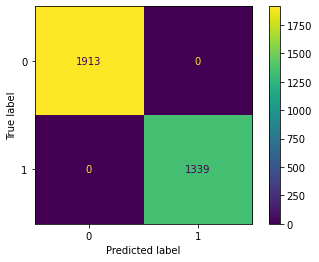

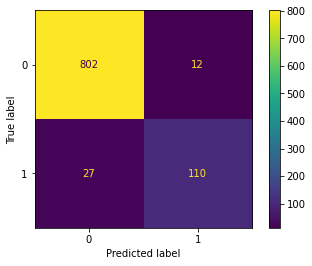

In [136]:
model_report(xgbc_clf, X_train_resampled, y_train_resampled, X_test, y_test)

okay this is better. but let's now comapare all the models in an ROC curve

## ROC and AUC curves 

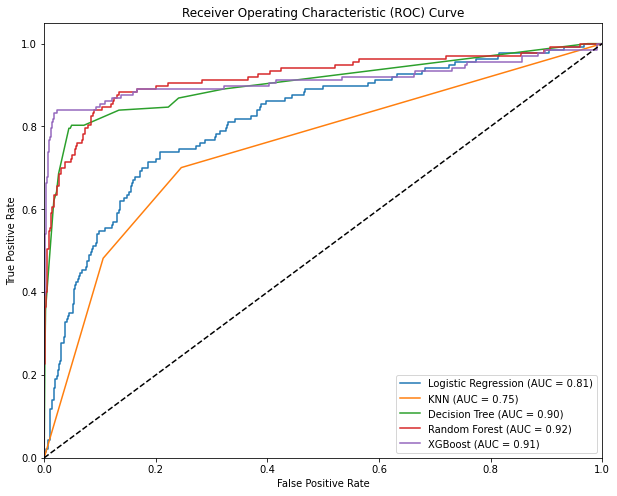

In [137]:
# Calculate predicted probabilities
y_prob_log_regularised = log_regularised.predict_proba(X_test)[:, 1]
y_prob_knn_final = knn_final.predict_proba(X_test)[:, 1]
y_prob_dt_final = dt_clf_final.predict_proba(X_test)[:, 1]
y_prob_rf_final = rf_clf_final.predict_proba(X_test)[:, 1]
y_prob_xgb_clf = xgbc_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUC scores
fpr_log_regularised, tpr_log_regularised, _ = roc_curve(y_test, y_prob_log_regularised)
roc_auc_log_regularised = auc(fpr_log_regularised, tpr_log_regularised)

fpr_knn_final, tpr_knn_final, _ = roc_curve(y_test, y_prob_knn_final)
roc_auc_knn_final = auc(fpr_knn_final, tpr_knn_final)

fpr_dt_final, tpr_dt_final, _ = roc_curve(y_test, y_prob_dt_final)
roc_auc_dt_final = auc(fpr_dt_final, tpr_dt_final)

fpr_rf_final, tpr_rf_final, _ = roc_curve(y_test, y_prob_rf_final)
roc_auc_rf_final = auc(fpr_rf_final, tpr_rf_final)

fpr_xgb_clf, tpr_xgb_clf, _ = roc_curve(y_test, y_prob_xgb_clf)
roc_auc_xgb_clf = auc(fpr_xgb_clf, tpr_xgb_clf)

# Plot ROC curves
plt.figure(figsize=(10, 8))

plt.plot(fpr_log_regularised, tpr_log_regularised, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_log_regularised))
plt.plot(fpr_knn_final, tpr_knn_final, label="KNN (AUC = {:.2f})".format(roc_auc_knn_final))
plt.plot(fpr_dt_final, tpr_dt_final, label="Decision Tree (AUC = {:.2f})".format(roc_auc_dt_final))
plt.plot(fpr_rf_final, tpr_rf_final, label="Random Forest (AUC = {:.2f})".format(roc_auc_rf_final))
plt.plot(fpr_xgb_clf, tpr_xgb_clf, label="XGBoost (AUC = {:.2f})".format(roc_auc_xgb_clf))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


* Logistic Regression 
This model achieves an AUC of 0.81. It performs okay but clearly not as good as the other models

* K-Nearest Neighbors
The KNN model achieves an AUC of 0.75, showing that it is weaker than logistic regression. 

* Decision Tree 
The decision tree model performs quite well with an AUC of 0.90.It effectively separates the positive and negative classes with minimal error.

* Random Forest 
The random forest model performs better than logistic regression and KNN with an AUC of 0.92. It is also effective in classifying instances into their respective classes.

* XGBoost 
XGBoost also performs very well with an AUC of 0.91

* In summary, the decision tree, random forest, and XGBoost models perform really well







## conclusion and recommendations




i would reccomend that SyriaTel look into using the XG-BOOST model to predict if a customer will soon churn and find ways to prevent it even before it happens, for example by reaching out to the customer and asking for feedback and improvments they could make to the customers account

### problems encountered

- the lack of proper computing power to run grid search was one. this leads to alot of time wastage


### next steps

- i would reccomend that syriatel gets developers to get developers to build a platform to allow employess access this model easily
- the platform could also be giving them alerts when a customer is close to leaving
- a pipeine to constatly update data and keep it timely should also be built